Perform the following geometric transformation operation using affine transformation
1. Translate the image from (x,y,z) to new coordinates
2. Rotate the image with different angles with respect to center
3. Scale the image using resize() function

In Euclidean geometry, an affine transformation, or an affinity (from the Latin, affinis, "connected with"), is a geometric transformation that preserves lines and parallelism (but not necessarily distances and angles).

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
plt.rcParams["figure.figsize"] = (10, 10)

In [ ]:
oimg = cv2.imread("/content/1.png", 1)

In [ ]:
rgbimg = cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB)
grayimg = cv2.cvtColor(oimg, cv2.COLOR_BGR2GRAY)
hlsimg = cv2.cvtColor(oimg, cv2.COLOR_BGR2HLS)
hsvimg = cv2.cvtColor(oimg, cv2.COLOR_BGR2HSV)
luvimg = cv2.cvtColor(oimg, cv2.COLOR_BGR2LUV)

Text(0.5, 1.0, 'LUV Converted')

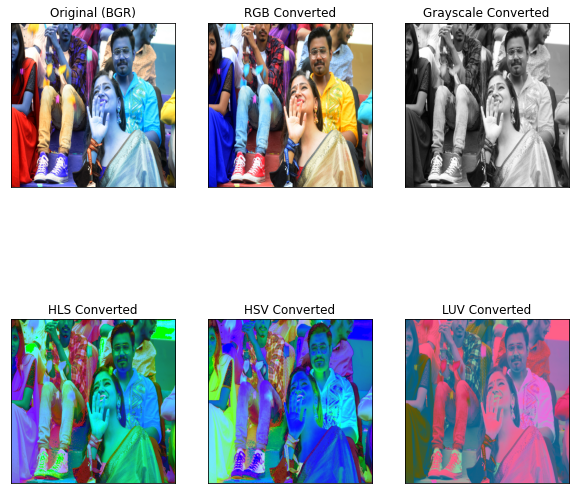

In [ ]:
plt.subplot(231)
plt.imshow(oimg)
plt.xticks([]), plt.yticks([])
plt.title("Original (BGR)")

plt.subplot(232)
plt.imshow(rgbimg)
plt.xticks([]), plt.yticks([])
plt.title("RGB Converted")

plt.subplot(233)
plt.imshow(grayimg, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Grayscale Converted")

plt.subplot(234)
plt.imshow(hlsimg)
plt.xticks([]), plt.yticks([])
plt.title("HLS Converted")

plt.subplot(235)
plt.imshow(hsvimg, cmap="hsv")
plt.xticks([]), plt.yticks([])
plt.title("HSV Converted")

plt.subplot(236)
plt.imshow(luvimg, cmap="hsv")
plt.xticks([]), plt.yticks([])
plt.title("LUV Converted")

In [ ]:
def add_noise(noise_type, image, **options):
  if noise_type == "gauss":
      row, col = image.shape
      mean = options["mean"] 
      sigma = options["sigma"]
      gauss = np.random.normal(mean, sigma, (row, col))
      gauss = gauss.reshape(row, col).astype(np.uint8)
      noisy = cv2.add(image, gauss)

      return noisy

  if noise_type == "s&p":
      row, col = image.shape
      s_vs_p = options["s_vs_p"]
      amount = options["amount"]
      out = np.copy(image)

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
      out[tuple(coords)] = 0
      
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
      out[tuple(coords)] = 255
      
      return out
      
  if noise_type == "poisson":
    noisy = np.random.poisson(options["prob"], image.shape).astype(np.uint8)
    out = cv2.add(image, noisy)
    return out
  
  if noise_type =="speckle":
    output = np.zeros(image.shape, np.uint8)

    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        rnd = random.random()

        if rnd < options["prob"]:
          output[i][j] = 128

          for k in range(5):
            output[i - k][j - k] = 128 + (10 * rnd)
        else:
          output[i][j] = image[i][j]
    return output

In [ ]:
gauss_img = add_noise("gauss", grayimg, mean=50, sigma=50)
s_p_img = add_noise("s&p", grayimg, s_vs_p=0.5, amount=0.5)
poisson_img = add_noise("poisson", grayimg, prob=75)
speckle_img = add_noise('speckle', grayimg, prob=0.1)

Text(0.5, 1.0, 'Speckle Noise')

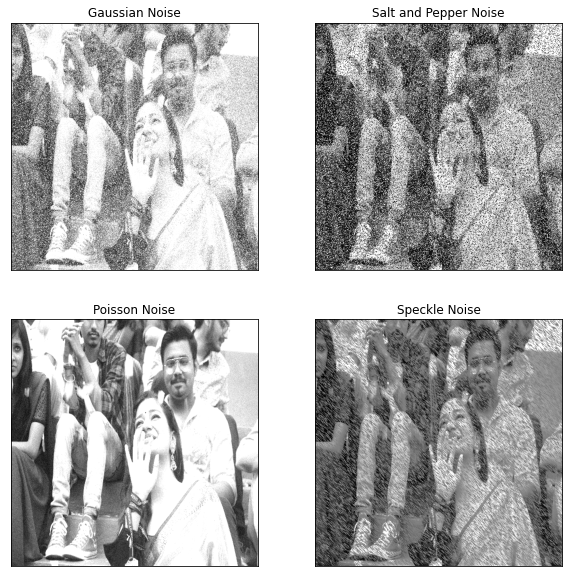

In [ ]:
plt.subplot(221)
plt.imshow(gauss_img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Gaussian Noise")

plt.subplot(222)
plt.imshow(s_p_img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Salt and Pepper Noise")

plt.subplot(223)
plt.imshow(poisson_img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Poisson Noise")

plt.subplot(224)
plt.imshow(speckle_img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Speckle Noise")

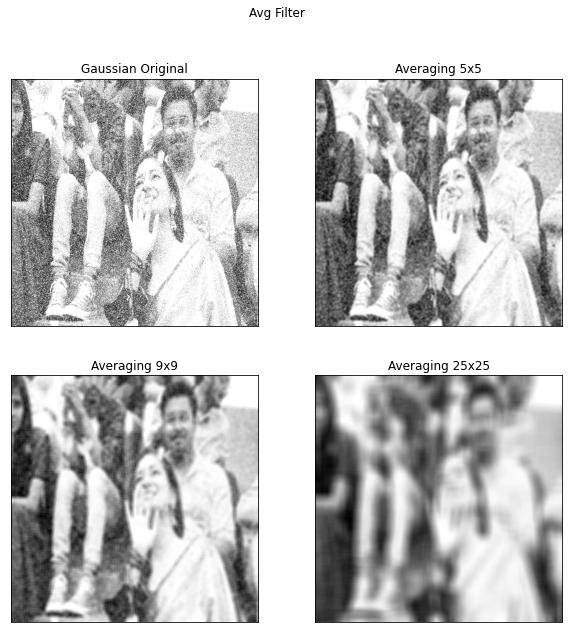

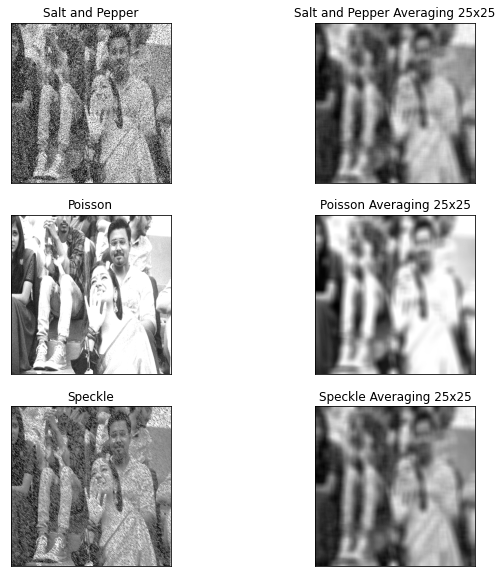

In [ ]:
kernel = np.ones((5, 5), np.float32) / 25
kernel1 = np.ones((9, 9), np.float32) / 81
kernel2 = np.ones((25, 25), np.float32) / 625
dst = cv2.filter2D(gauss_img, -1, kernel)
dst1 = cv2.filter2D(gauss_img, -1, kernel1)
dst2 = cv2.filter2D(gauss_img, -1, kernel2)
sp_blur = cv2.filter2D(s_p_img, -1, kernel2)
poisson_blur = cv2.filter2D(poisson_img, -1, kernel2)
speckle_blur = cv2.filter2D(speckle_img, -1, kernel2)

plt.subplot(221)
plt.imshow(gauss_img, cmap='gray')
plt.title('Gaussian Original')
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(dst, cmap='gray')
plt.title('Averaging 5x5')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(dst1, cmap='gray')
plt.title('Averaging 9x9')
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(dst2, cmap='gray')
plt.title('Averaging 25x25')
plt.xticks([])
plt.yticks([])

plt.suptitle("Avg Filter")

plt.show()

plt.subplot(321)
plt.imshow(s_p_img, cmap="gray")
plt.title("Salt and Pepper")
plt.xticks([])
plt.yticks([])

plt.subplot(322)
plt.imshow(sp_blur, cmap="gray")
plt.title("Salt and Pepper Averaging 25x25")
plt.xticks([])
plt.yticks([])

plt.subplot(323)
plt.imshow(poisson_img, cmap="gray")
plt.title("Poisson")
plt.xticks([])
plt.yticks([])

plt.subplot(324)
plt.imshow(poisson_blur, cmap="gray")
plt.title("Poisson Averaging 25x25")
plt.xticks([])
plt.yticks([])

plt.subplot(325)
plt.imshow(speckle_img, cmap="gray")
plt.title("Speckle")
plt.xticks([])
plt.yticks([])

plt.subplot(326)
plt.imshow(speckle_blur, cmap="gray")
plt.title("Speckle Averaging 25x25")
plt.xticks([])
plt.yticks([])

plt.show()

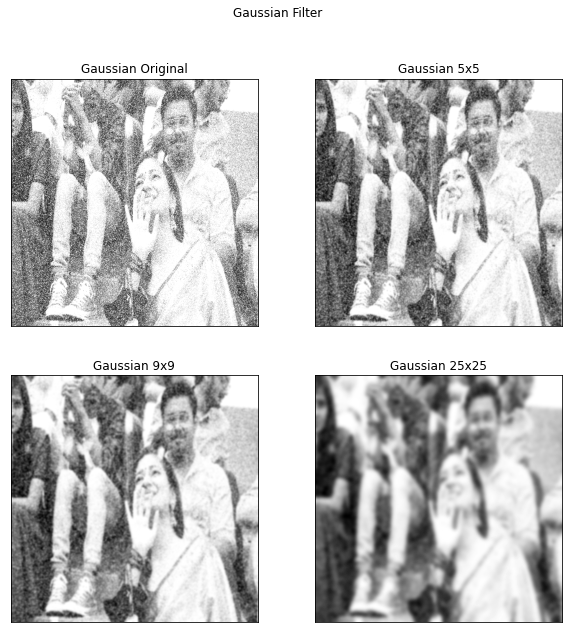

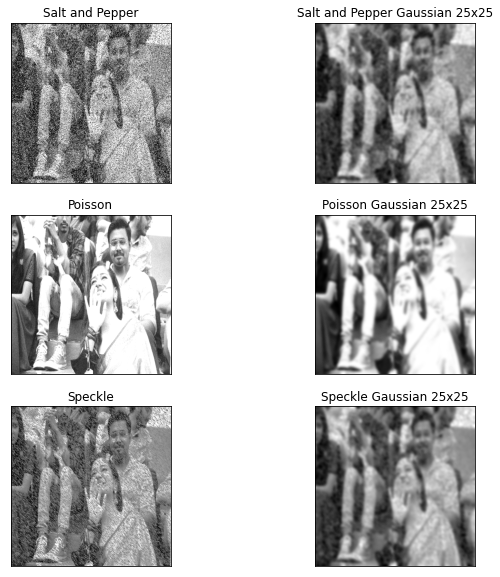

In [ ]:
gau_blur = cv2.GaussianBlur(gauss_img, (5, 5), 0)
gau_blur1 = cv2.GaussianBlur(gauss_img, (9, 9), 0)
gau_blur2 = cv2.GaussianBlur(gauss_img, (25, 25), 0)
sp_blur = cv2.GaussianBlur(s_p_img, (25, 25), 0)
poisson_blur = cv2.GaussianBlur(poisson_img, (25, 25), 0)
speckle_blur = cv2.GaussianBlur(speckle_img, (25, 25), 0)

plt.subplot(221)
plt.imshow(gauss_img, cmap='gray')
plt.title('Gaussian Original')
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(gau_blur, cmap='gray')
plt.title('Gaussian 5x5')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(gau_blur1, cmap='gray')
plt.title('Gaussian 9x9')
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(gau_blur2, cmap='gray')
plt.title('Gaussian 25x25')
plt.xticks([])
plt.yticks([])

plt.suptitle("Gaussian Filter")

plt.show()

plt.subplot(321)
plt.imshow(s_p_img, cmap="gray")
plt.title("Salt and Pepper")
plt.xticks([])
plt.yticks([])

plt.subplot(322)
plt.imshow(sp_blur, cmap="gray")
plt.title("Salt and Pepper Gaussian 25x25")
plt.xticks([])
plt.yticks([])

plt.subplot(323)
plt.imshow(poisson_img, cmap="gray")
plt.title("Poisson")
plt.xticks([])
plt.yticks([])

plt.subplot(324)
plt.imshow(poisson_blur, cmap="gray")
plt.title("Poisson Gaussian 25x25")
plt.xticks([])
plt.yticks([])

plt.subplot(325)
plt.imshow(speckle_img, cmap="gray")
plt.title("Speckle")
plt.xticks([])
plt.yticks([])

plt.subplot(326)
plt.imshow(speckle_blur, cmap="gray")
plt.title("Speckle Gaussian 25x25")
plt.xticks([])
plt.yticks([])

plt.show()

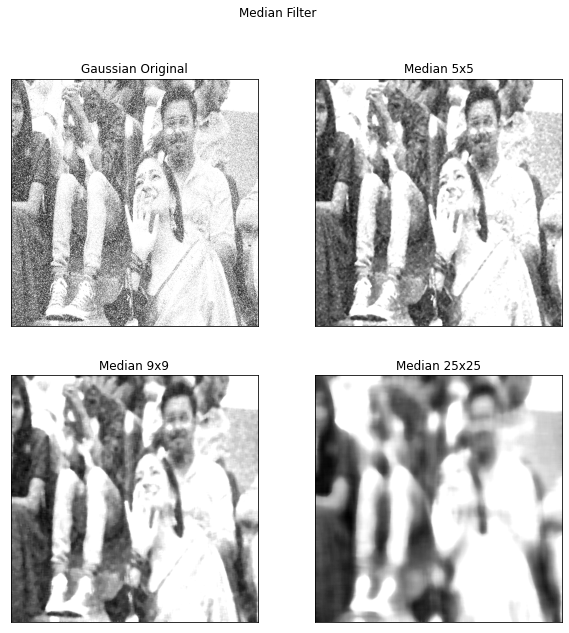

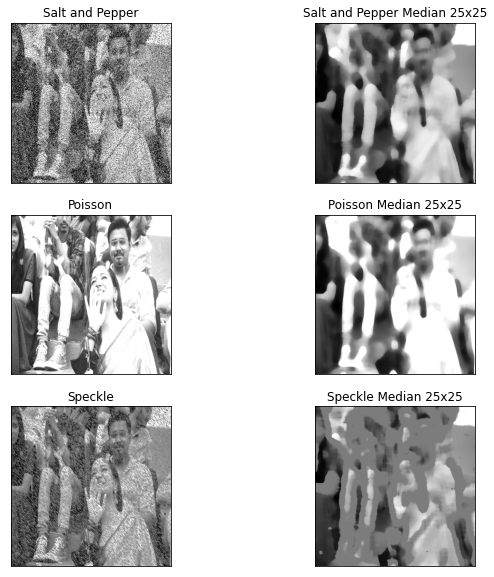

In [ ]:
median_blur = cv2.medianBlur(gauss_img, 5)
median_blur1 = cv2.medianBlur(gauss_img, 9)
median_blur2 = cv2.medianBlur(gauss_img, 25)
sp_blur = cv2.medianBlur(s_p_img, 25)
poisson_blur = cv2.medianBlur(poisson_img, 25)
speckle_blur = cv2.medianBlur(speckle_img, 25)

plt.subplot(221)
plt.imshow(gauss_img, cmap='gray')
plt.title('Gaussian Original')
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(median_blur, cmap='gray')
plt.title('Median 5x5')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(median_blur1, cmap='gray')
plt.title('Median 9x9')
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(median_blur2, cmap='gray')
plt.title('Median 25x25')
plt.xticks([])
plt.yticks([])

plt.suptitle("Median Filter")

plt.show()

plt.subplot(321)
plt.imshow(s_p_img, cmap="gray")
plt.title("Salt and Pepper")
plt.xticks([])
plt.yticks([])

plt.subplot(322)
plt.imshow(sp_blur, cmap="gray")
plt.title("Salt and Pepper Median 25x25")
plt.xticks([])
plt.yticks([])

plt.subplot(323)
plt.imshow(poisson_img, cmap="gray")
plt.title("Poisson")
plt.xticks([])
plt.yticks([])

plt.subplot(324)
plt.imshow(poisson_blur, cmap="gray")
plt.title("Poisson Median 25x25")
plt.xticks([])
plt.yticks([])

plt.subplot(325)
plt.imshow(speckle_img, cmap="gray")
plt.title("Speckle")
plt.xticks([])
plt.yticks([])

plt.subplot(326)
plt.imshow(speckle_blur, cmap="gray")
plt.title("Speckle Median 25x25")
plt.xticks([])
plt.yticks([])

plt.show()